[Google Colab Project](https://colab.research.google.com/drive/1JKrT4kXZWfKy4ESDI5vKZQS0rsRGW48q?usp=sharing)

# BIRCH

**BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)** is a clustering algorithm designed for large datasets. It is particularly effective when memory is limited or when data size makes traditional clustering algorithms computationally expensive. BIRCH constructs a hierarchical structure (a tree) to incrementally build clusters, making it efficient for dynamic data and large-scale applications.


<img src='https://images.javatpoint.com/tutorial/data-mining/images/birch-in-data-mining.png'>

**How BIRCH Works:**
1. Clustering Feature (CF) Tree: BIRCH builds a tree structure, known as the Clustering Feature Tree (CF Tree), which stores summaries of clusters.
Each node in the tree stores information about clusters, including the number of points, their centroid, and the radius of the cluster.
2. Incremental Clustering: BIRCH incrementally adds data points to the tree. The tree grows as more data points are added, but its size remains manageable because of pruning and summarization mechanisms.
3. Multi-phase Process:
  * Construct the CF Tree by summarizing the dataset.
  * Optionally, a second phase can perform further clustering (such as K-means) on the compressed data to improve results.

**Parameters** of BIRCH Clustering:
* threshold: Defines the maximum radius of the subclusters in each node of the CF Tree.
A smaller threshold value leads to smaller clusters, and a larger threshold value allows larger clusters.

* branching_factor: Controls the maximum number of child nodes (clusters) that a node can have in the CF Tree.
A higher value allows more clusters at each level of the tree, potentially reducing the height of the tree.

* n_clusters: Specifies the final number of clusters you want. If set to None, BIRCH will attempt to find the optimal number of clusters by itself.

* compute_labels: If True, the algorithm will compute labels for each point. Otherwise, it will not.

* copy: If True, the data is copied before clustering to avoid modifying the original dataset.

**BIRCH in make_moons and make_circles dataset**

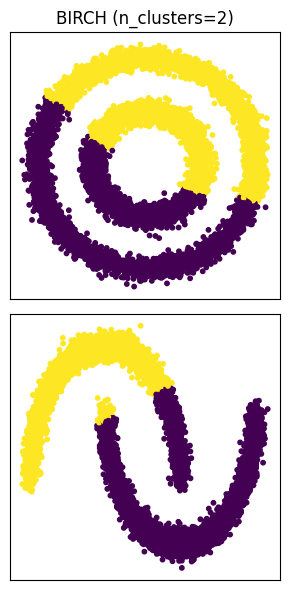

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import datasets
from sklearn.cluster import Birch, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Generate datasets
n_samples = 10000
datasets = [
    datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05),
    datasets.make_moons(n_samples=n_samples, noise=0.05),
]

# Set up the plot
plt.figure(figsize=(3, 6))  # Plot size for 2 datasets

# Apply Birch with n_clusters=2 and single linkage
clustering_algorithm = Birch(threshold=0.5, branching_factor=50, n_clusters=2)
#clustering_algorithm = AgglomerativeClustering(n_clusters=2, linkage='single')

# Plot each dataset
plot_num = 1
for i_dataset, (X, true_labels) in enumerate(datasets):
    X = StandardScaler().fit_transform(X)  # Standardize data

    t0 = time.time()

    # Fit the clustering model
    clustering_algorithm.fit(X)
    y_pred = clustering_algorithm.labels_.astype(int)

    t1 = time.time()
    plt.subplot(len(datasets), 1, plot_num)  # One column for 2 datasets
    if plot_num == 1:
        plt.title("BIRCH (n_clusters=2)", size=12)

    # Plot the clustering results
    plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred, cmap='viridis')

    plt.xticks([])
    plt.yticks([])

    plot_num += 1

plt.tight_layout()
plt.show()


**Generating and Visualizing Elongated and Rotated Blobs**

We create and visualize synthetic data consisting of clusters (blobs) that are elongated along one axis and rotated by 135 degrees. The make_blobs function from sklearn.datasets is used to generate clusters, which are then transformed to create elongated shapes by scaling the X-axis and applying a rotation matrix. The result is displayed as a scatter plot with distinct colors representing the clusters.

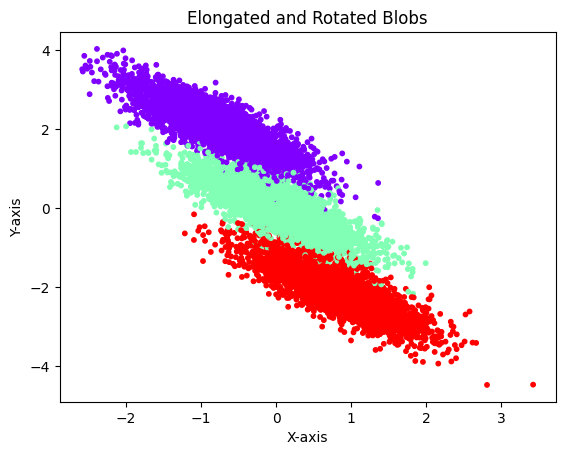

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Function to generate elongated and rotated blobs
def generate_elongated_blobs():
    # Create three clusters using make_blobs with custom centers
    X, y = make_blobs(n_samples=10000, centers=[[-3, -2], [0, 0], [3, 2]], cluster_std=[0.8, 0.8, 0.8], random_state=42)

    # Compress the data along the X-axis to make the blobs elongated
    X[:, 0] = X[:, 0] * 0.3  # Compress along X-axis

    # Rotate the data by 135 degrees (to match your request)
    theta = np.radians(135)  # Convert degrees to radians
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

    # Apply the rotation matrix to the data
    X = X.dot(rotation_matrix)

    return X, y

# Function to visualize the blobs
def plot_blobs(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=10)
    plt.title('Elongated and Rotated Blobs')
    plt.xlabel('X-axis')  # Label for X-axis
    plt.ylabel('Y-axis')  # Label for Y-axis
    #plt.grid(True)  # Add grid for better visibility
    plt.show()

# Generate the elongated and rotated blobs
X, y = generate_elongated_blobs()

# Plot the blobs with axis numbers
plot_blobs(X, y)


**BIRCH in make_blobs dataset**

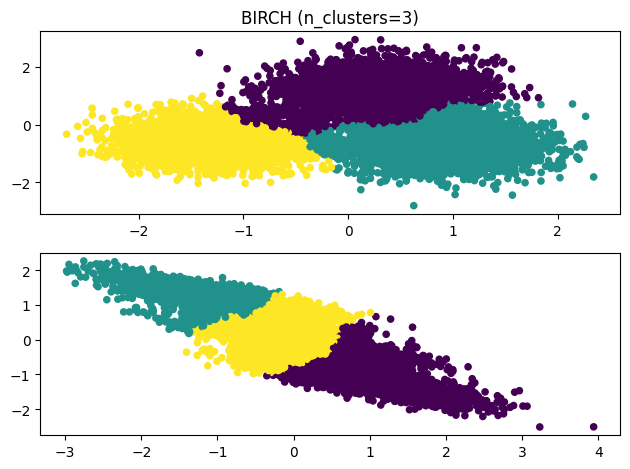

In [ ]:
# import sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch
from sklearn import datasets
from sklearn.metrics import silhouette_score

n_samples = 10000

datasets = [
    datasets.make_blobs(n_samples = n_samples, random_state = 2112, cluster_std=2.7),
    generate_elongated_blobs()
]

#blobs_coord, blob_classes = make_blobs(n_samples = n_samples, random_state = 2112)

t0 = time.time()
# Apply Birch with n_clusters=3
clustering_algorithm = Birch(threshold=0.5, branching_factor=50, n_clusters=3)
#clustering_algorithm = AgglomerativeClustering(n_clusters=3)
# Plot each dataset
plot_num = 1
for i_dataset, (X, true_labels) in enumerate(datasets):
    X = StandardScaler().fit_transform(X)  # Standardize data

    t0 = time.time()

    # Fit the clustering model
    clustering_algorithm.fit(X)
    y_pred = clustering_algorithm.labels_.astype(int)

    t1 = time.time()
    plt.subplot(len(datasets), 1, plot_num)  # One column for 2 datasets

    if plot_num == 1:
        plt.title("BIRCH (n_clusters=3)", size=12)

    # Plot the clustering results
    plt.scatter(X[:, 0], X[:, 1], s=20, c=y_pred, cmap='viridis')

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plot_num += 1

plt.tight_layout()
plt.show()



